In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical


def Visulaize(histories, key='loss'):
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Test')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])    
    plt.savefig("plot.png")
 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 - 2s - loss: 0.3324 - accuracy: 0.9058 - val_loss: 0.1688 - val_accuracy: 0.9499
Epoch 2/20
469/469 - 1s - loss: 0.1354 - accuracy: 0.9604 - val_loss: 0.1142 - val_accuracy: 0.9676
Epoch 3/20
469/469 - 1s - loss: 0.0957 - accur

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


예측한 Test Data 클래스 :  [7 2 1 ... 4 5 6]


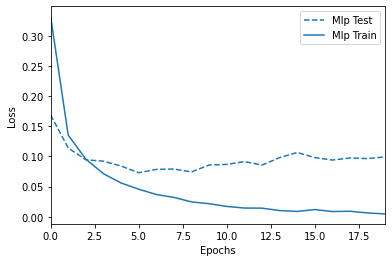

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
 

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)

'''
1. MNIST 데이테 셋을 전처리하는 'preprocess' 함수를 완성합니다.

   Step01. MNIST 데이터 이미지를 
           0~1 사이 값으로 정규화해줍니다.
           원본은 0~255 사이의 값입니다.
           
   Step02. 0~9 사이 값인 label을 클래스화 하기 위해 
           원-핫 인코딩을 진행합니다.
'''

def preprocess():
    
    # MNIST 데이터 세트를 불러옵니다.
    mnist = tf.keras.datasets.mnist
    
    # MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
    # 데이터 정규화
    train_images = train_images / 255.
    test_images = test_images / 255.
    
    # 원-핫 인코딩 (label을 클래스화) 
    train_labels = to_categorical(train_labels,10)
    test_labels = to_categorical(test_labels, 10)
    
    return train_images, test_images, train_labels, test_labels

'''
2. 다층 퍼셉트론(MLP) 모델을 생성합니다.
'''
def MLP():
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model
    
'''
3. 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. MLP 함수를 통해 모델을 불러옵니다.
   
   Step02. 모델의 손실 함수, 최적화 알고리즘, 
          평가 방법을 설정합니다.
   
   Step03. 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 모델을 학습시킵니다. 검증용 데이터도 설정하세요.
           'epochs'와 'batch_size'도 자유롭게 설정하세요.
              
   Step05. 모델을 테스트하고 손실(loss)값과 
           Test Accuracy 값 및 예측 클래스, 
           손실 함수값 그래프를 출력합니다. 
           
           모델의 성능을 확인해보고,
           목표값을 달성해보세요.
'''

def main():
    
    train_images, test_images, train_labels, test_labels = preprocess()
    
    model = MLP()
    
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    history = model.fit(train_images,train_labels, epochs=20, batch_size=128, validation_data = (test_images, test_labels), verbose = 2)
    
    loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)
    
    print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
    print('예측한 Test Data 클래스 : ',model.predict_classes(test_images))
    
    Visulaize([('MLP', history)], 'loss')
    
    return history
    
if __name__ == "__main__":
    main()